In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

### Flow to the Project
1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Model Evaluation

## 1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#Drop last 2 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
df.sample(4)

,v1,v2
5145,ham,Aiyar u so poor thing... I give u my support k...
1503,ham,Ill be there on &lt;#&gt; ok.
880,spam,Reminder: You have not downloaded the content ...
1438,ham,"Arms fine, how's Cardiff and uni?"


In [9]:
#Rename the columns
df.rename(columns={'v1':'Target','v2':'Message'},inplace=True)

In [10]:
#changing ham=0 and spam=1
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()

In [12]:
df['Target'] = label_encoder.fit_transform(df['Target'])

In [13]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing value
df.isna().sum()

Target     0
Message    0
dtype: int64

In [15]:
#check for Duplicate value
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2.EDA

In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

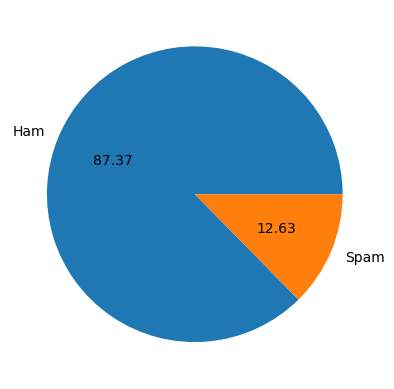

In [20]:
plt.pie(x=df['Target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

In [21]:
!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['Message'].apply(len)

In [25]:
df.head(4)

,Target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [26]:
#num of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head(3)

,Target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [28]:
#num of sentence
df['num_sentences']= df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.describe()

,Target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [30]:
    # fro ham
    df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# fro spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


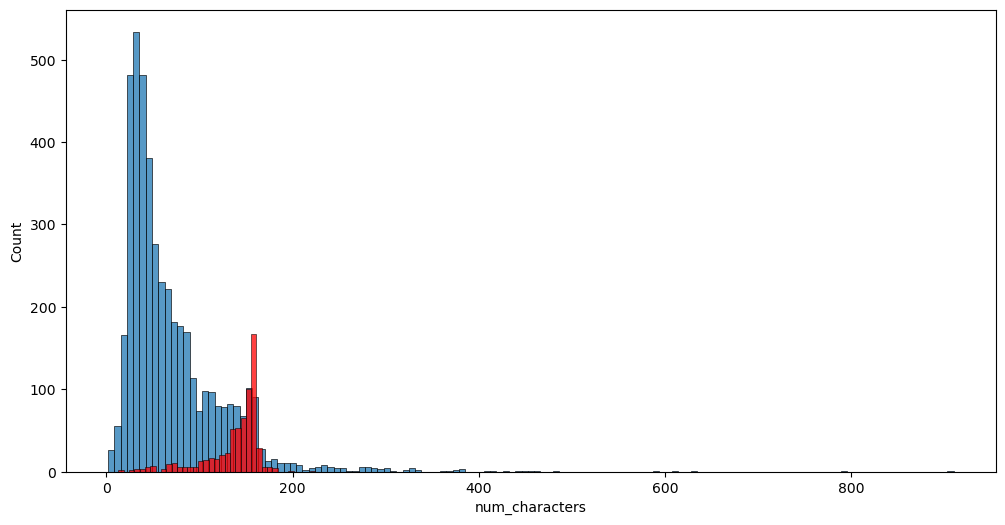

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')
plt.show()

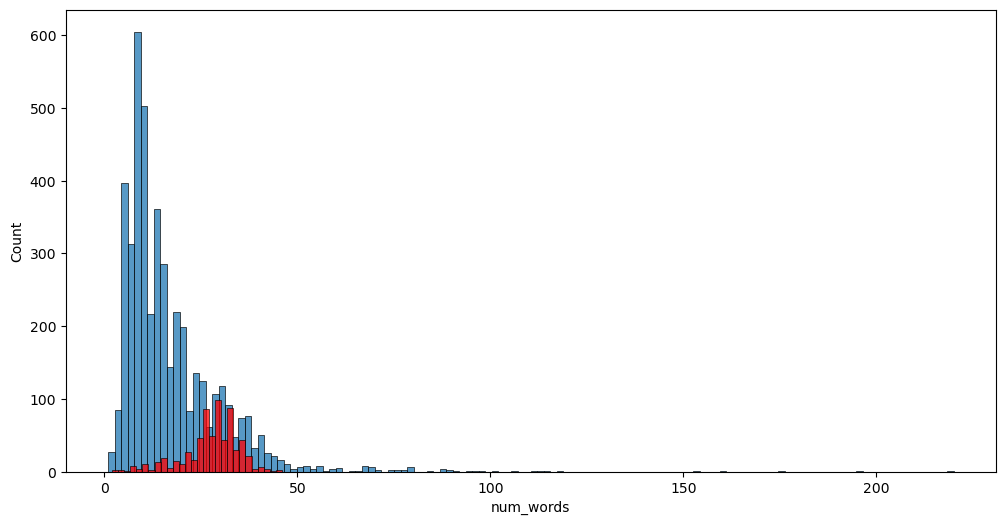

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')
plt.show()

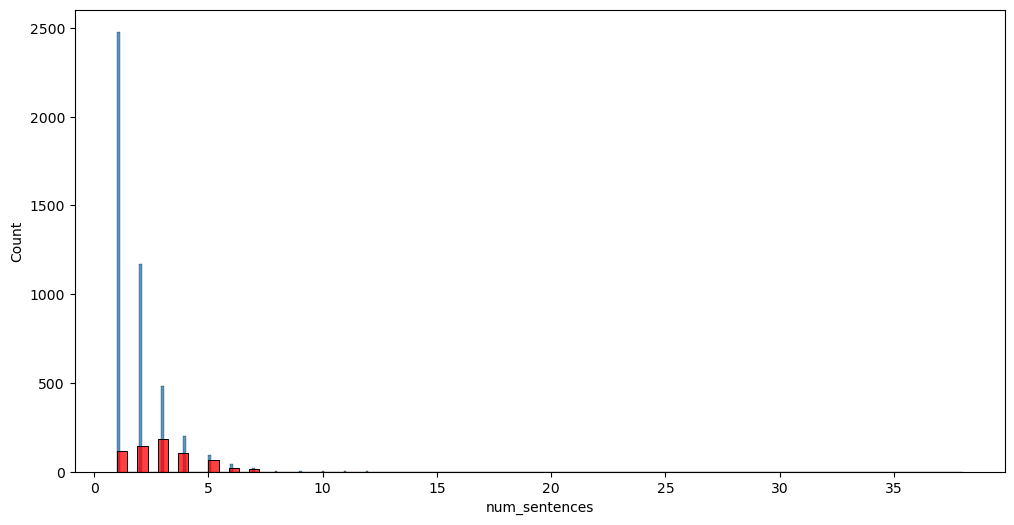

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'],color='red')
plt.show()

In [35]:
df.head()

,Target,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df_corr = df.drop(columns=['Message'])

In [37]:
df_corr

,Target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


<Axes: >

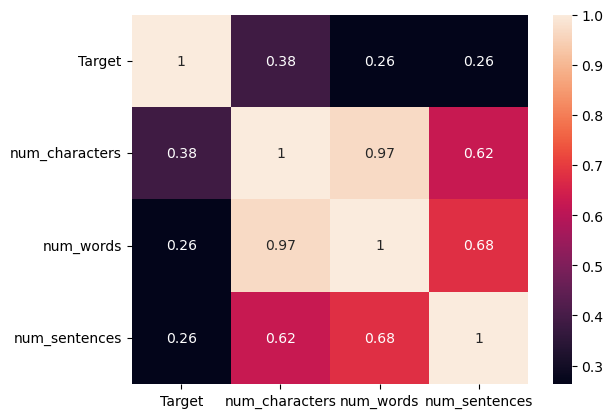

In [38]:
sns.heatmap(df_corr.corr(),annot=True)

1. Target is depend on all the col but it highly depend on 'num_characters' col
2. There is multi-collineraity so we will take only one col ony 

## 3. Data(Text) Preprocesing
i. Lower Case

ii.Tokenization

iii.Removing special characters

iv. Removing stop words and punctuation

v. Stemming

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum(): 
        #check if the word from text is aplhabe or number if it is the append it in a new list y
            y.append(i)
    text = y[:] # colning the y list in text
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [44]:
df['Message'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [45]:
transform_text("Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx")

'okay name ur price long legal wen pick u ave x am xx'

In [46]:
df['Transformed_Message']=df['Message'].apply(transform_text)

In [47]:
df.head(10)

,Target,Message,num_characters,num_words,num_sentences,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [48]:
! pip install wordcloud

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color= 'white')

In [50]:
span_wc = wc.generate(df[df['Target']==1]['Transformed_Message'].str.cat(sep=" "))

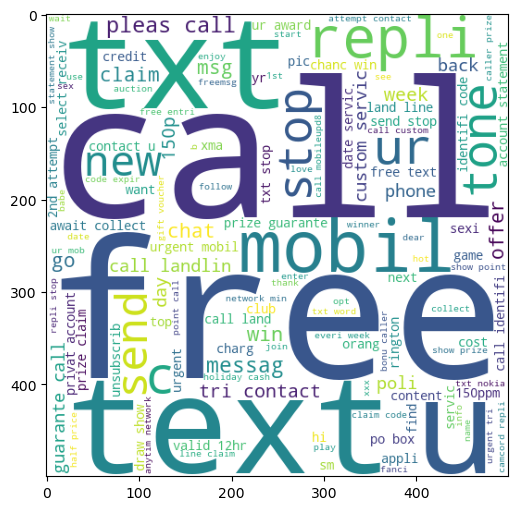

In [51]:
plt.figure(figsize=(16,6))
plt.imshow(span_wc)

In [52]:
ham_wc = wc.generate(df[df['Target']==0]['Transformed_Message'].str.cat(sep=" "))

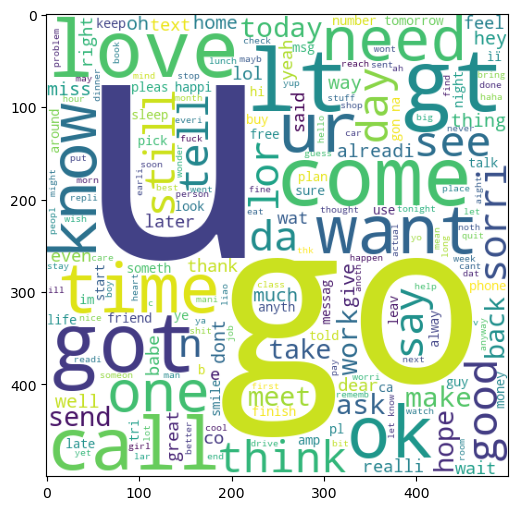

In [53]:
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)

In [54]:
 spam_corpus=[]
for msg in df[df['Target']==1]['Transformed_Message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

In [56]:
from collections import Counter 

In [57]:
X = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
Y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

In [58]:
most_common_word_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [59]:
most_common_word_df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


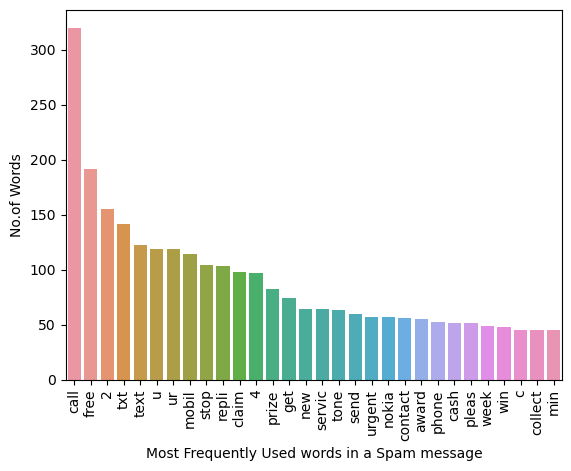

In [60]:
sns.barplot(most_common_word_df,x=most_common_word_df[0],y=most_common_word_df[1])
plt.xticks(rotation='vertical')
plt.xlabel(xlabel="Most Frequently Used words in a Spam message")
plt.ylabel(ylabel="No.of Words")
plt.show()

In [61]:
 ham_corpus=[]
for msg in df[df['Target']==0]['Transformed_Message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

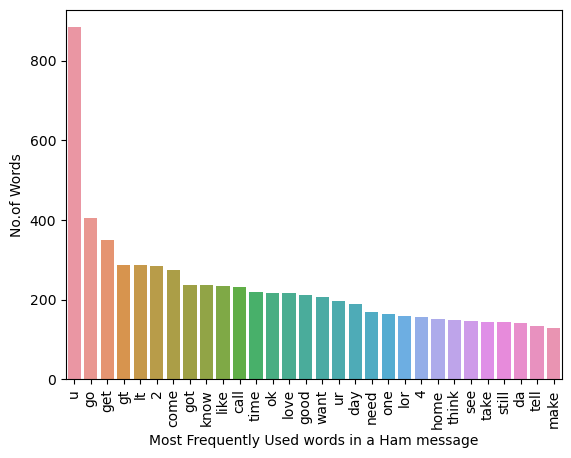

In [62]:
most_common_word_ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(most_common_word_ham_df,x=most_common_word_ham_df[0],y=most_common_word_ham_df[1])
plt.xticks(rotation='vertical')
plt.xlabel(xlabel="Most Frequently Used words in a Ham message")
plt.ylabel(ylabel="No.of Words")
plt.show()

## 4.Model Building

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [64]:
X = cv.fit_transform(df['Transformed_Message']).toarray()

In [65]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
y = df['Target'].values

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred_gnb))
print("Precision Score: ",precision_score(y_test,y_pred_gnb))

Accuracy Score:  0.8800773694390716
Confusion Matrix:  [[792 104]
 [ 20 118]]
Precision Score:  0.5315315315315315


In [72]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred_mnb))
print("Precision Score: ",precision_score(y_test,y_pred_mnb))

Accuracy Score:  0.9642166344294004
Confusion Matrix:  [[871  25]
 [ 12 126]]
Precision Score:  0.8344370860927153


In [73]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred_bnb))
print("Precision Score: ",precision_score(y_test,y_pred_bnb))

Accuracy Score:  0.9700193423597679
Confusion Matrix:  [[893   3]
 [ 28 110]]
Precision Score:  0.9734513274336283


## Modeling building with TfidfVectorizer

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [75]:
X = cv.fit_transform(df['Transformed_Message']).toarray()
y = df['Target'].values

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
gnb_t = GaussianNB()
mnb_t = MultinomialNB()
bnb_t = BernoulliNB()

In [78]:
gnb_t.fit(X_train,y_train)
y_pred_gnb = gnb_t.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred_gnb))
print("Precision Score: ",precision_score(y_test,y_pred_gnb))

Accuracy Score:  0.8800773694390716
Confusion Matrix:  [[792 104]
 [ 20 118]]
Precision Score:  0.5315315315315315


In [79]:
mnb_t.fit(X_train,y_train)
y_pred_mnb = mnb_t.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred_mnb))
print("Precision Score: ",precision_score(y_test,y_pred_mnb))

Accuracy Score:  0.9642166344294004
Confusion Matrix:  [[871  25]
 [ 12 126]]
Precision Score:  0.8344370860927153


In [80]:
bnb_t.fit(X_train,y_train)
y_pred_bnb = bnb_t.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred_bnb))
print("Precision Score: ",precision_score(y_test,y_pred_bnb))

Accuracy Score:  0.9700193423597679
Confusion Matrix:  [[893   3]
 [ 28 110]]
Precision Score:  0.9734513274336283


As the Precision score of BernoulliNB is high as compare with other so we take BernoulliNB as your model

## Trying Other Model 

In [81]:
!pip install xgboost

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [83]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [84]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [85]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [87]:
#Checking the train_classifier fuction
current_accuracy,current_precision = train_classifier(mnb,X_train,y_train,X_test,y_test)
print("Accuracy: ",current_accuracy)
print("Prescision: ",current_precision)

Accuracy:  0.9642166344294004
Prescision:  0.8344370860927153


#To strore accuracy and precision for all the model
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("From: ",name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

In [88]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(bnb_t,open('model.pkl','wb'))